# Imports

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Loading on main rover joint through payload lift. Payload mass represents FSP


- Calculates the torque on the two main lifting motors throughout the payload lift operations and plots the moment required as a function of the angle.

<function matplotlib.pyplot.show(close=None, block=None)>

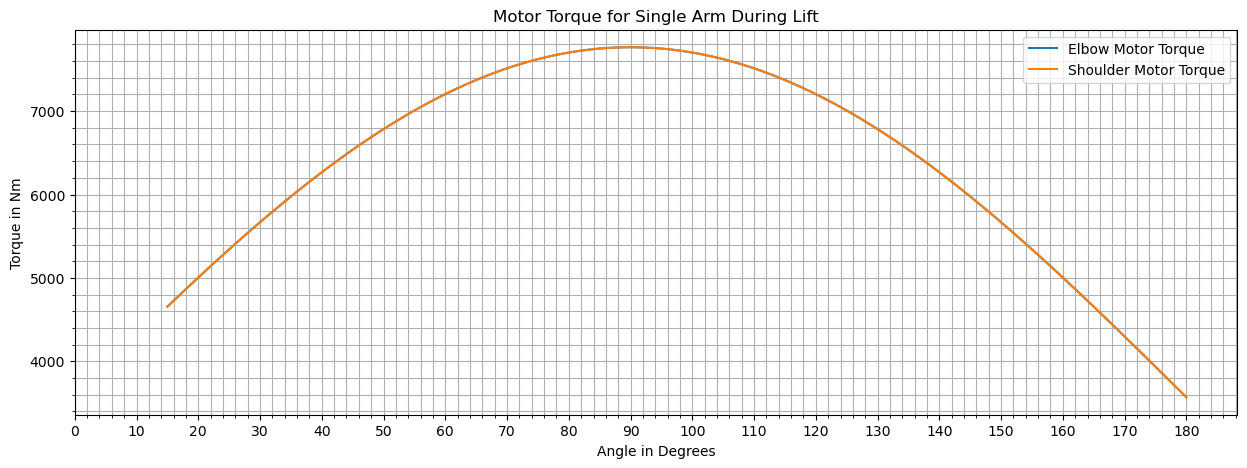

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m_pay = 6000 #kg
m_body = 562 #kg
m_arm1 = 313 #kg 
arm_1_l = 1.8 #m
body_w = 3.5 #m
g = 3.73 #m/s/s
m_r = 1 # M1/M2
start_anlge = 15 #deg
end_angle = 180 #deg
res = 1000

def Moments(theta, motor_ratio=1):
    M = m_arm1*g*np.sin(theta)*arm_1_l/2 + (1/6)*(m_pay+m_body)*g*(np.sin(theta)*arm_1_l + body_w/2)
    M1 = M/(1+1/motor_ratio)
    M2 = M-M1
    return M1, M2 

angles = np.linspace(start_anlge,end_angle,res)
M1_vals = []
M2_vals = []
for theta in angles:
    Ms = Moments(np.radians(theta),m_r)
    M1_vals.append(Ms[0])
    M2_vals.append(Ms[1])

plt.figure(figsize=(15,5))
plt.plot(angles,M1_vals,label='Elbow Motor Torque')
plt.plot(angles,M2_vals,label='Shoulder Motor Torque')
plt.legend()
plt.ylabel("Torque in Nm")
plt.xlabel("Angle in Degrees")
plt.minorticks_on()
plt.xticks(np.linspace(0,180,19))
plt.grid(True,which='both')
plt.title('Motor Torque for Single Arm During Lift')
plt.show